# Dataset Information

Given a set of features extracted from the shape of the beans in images and  it's required to predict the class of a bean given some features about its shape.
There are 7 bean types in this dataset.

**Data fields**
- ID - an ID for this instance
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.


<img src= "https://www.thespruceeats.com/thmb/eeIti36pfkoNBaipXrTHLjIv5YA=/1888x1416/smart/filters:no_upscale()/DriedBeans-56f6c2c43df78c78418c3b46.jpg" alt ="Titanic" style='width: 800px;height:400px'>

# `00` Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

# `01` Read Data 

In [2]:
df = pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake02/train.csv')
df.head()


,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


# `02` EDA

### `2.0` Explore Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [4]:
df.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [5]:
df.y.unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

### `2.1` Check Nulls

In [6]:
# Check Nulls
((df.isnull().sum()/df.shape[0])*100)

ID                 0.0
Area               0.0
Perimeter          0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
AspectRation       0.0
Eccentricity       0.0
ConvexArea         0.0
EquivDiameter      0.0
Extent             0.0
Solidity           0.0
roundness          0.0
Compactness        0.0
ShapeFactor1       0.0
ShapeFactor2       0.0
ShapeFactor3       0.0
ShapeFactor4       0.0
y                  0.0
dtype: float64

### `2.2` Check Duplicates

In [7]:
print(df.duplicated().sum())

0


### `2.3` Check Imbalance

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64


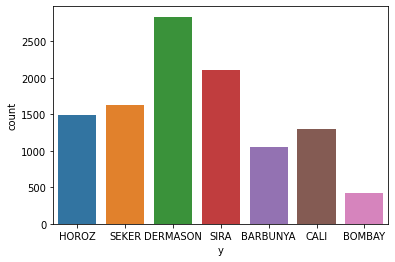

In [8]:
print(df['y'].value_counts())
_ = sns.countplot(x='y', data=df)

### `2.4` Check Normality

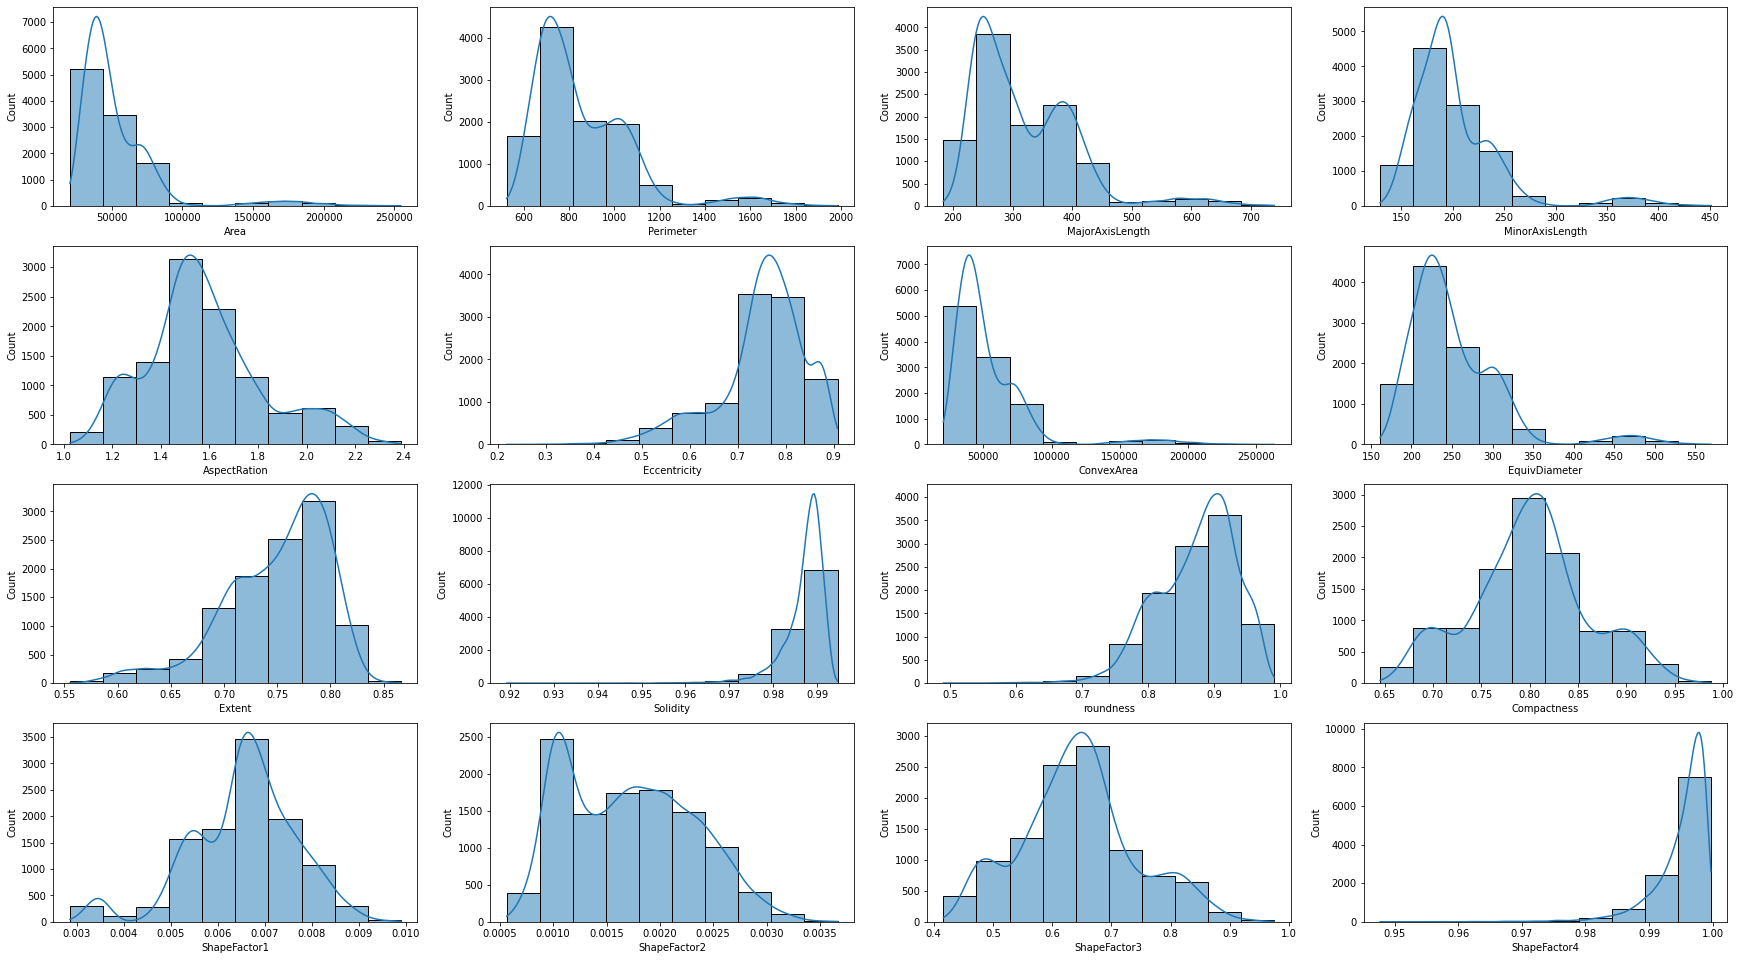

In [9]:
plt.figure(figsize=(30, 30))
for i, col in enumerate(df.iloc[:,1:-1]):
    plt.subplot(7, 4, i+1)
    sns.histplot(df[col], kde=True, bins=10)

### `2.5` Check Outliers

In [10]:
df.columns[0]

'ID'

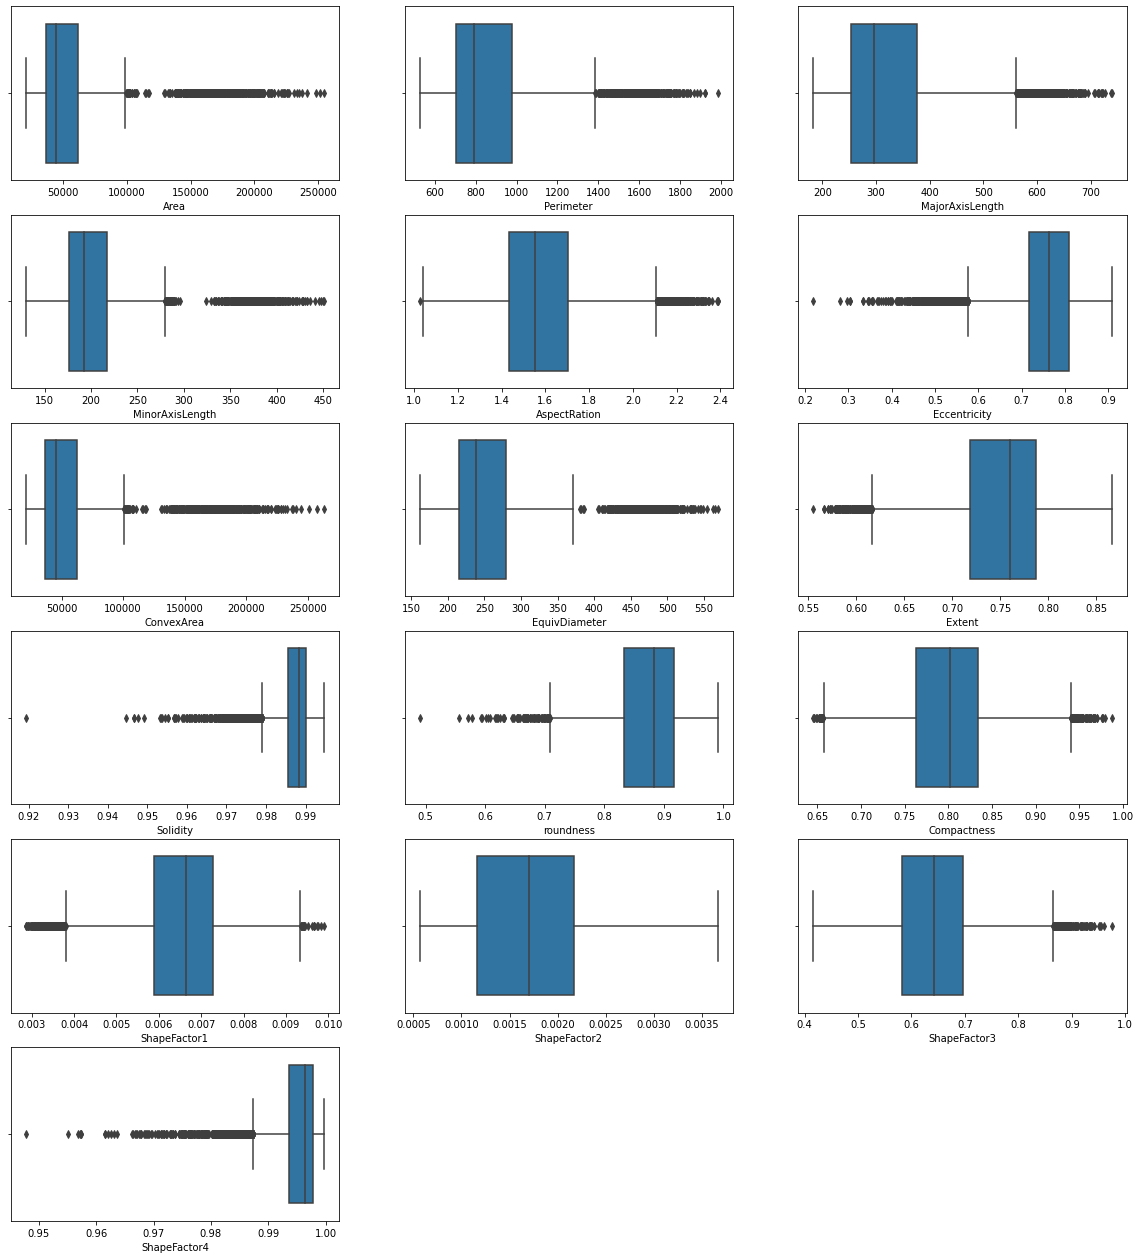

In [11]:
plt.figure(figsize=(20, 30))

for i, col in enumerate(df.iloc[:,1:-1]):
    plt.subplot(8, 3, i+1)
    sns.boxplot(x = df[col])


### `2.6` Check Corrolation

<AxesSubplot:>

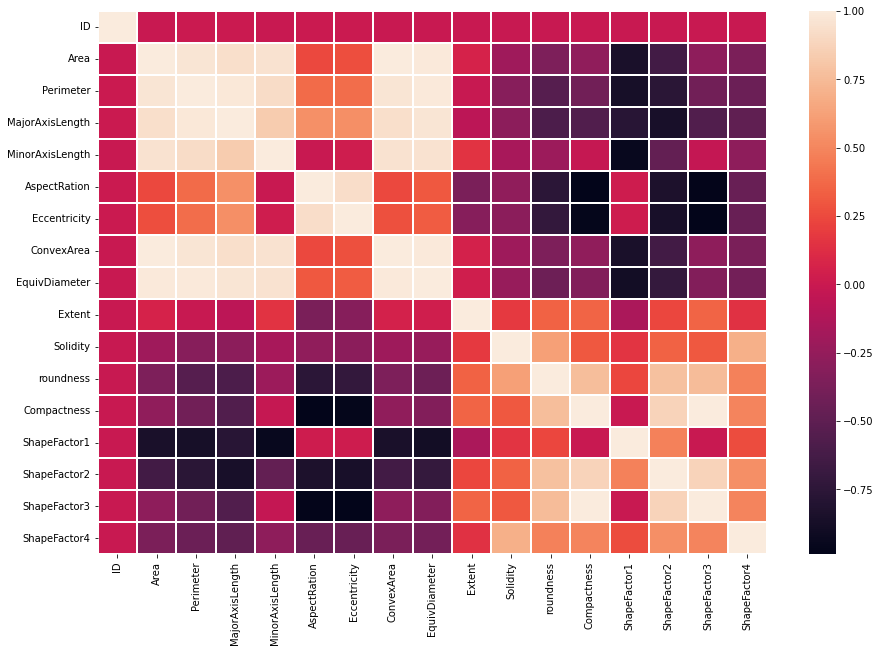

In [12]:
# making a heatmap to inspect the highly correlated features
corr_matrix = df.corr()
plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix, 
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values, 
           linewidth = 0.1)

## **Observations :**

<b>

1) No missing Values

2) No Duplicates

3) The Data Suffers from Skeweness

4) The Data Suffers from Outliers

5) There is High correlation between Features

6) Data is Imblanaced

</b>


# `03` Feature Engineering

### `3.1` Response Variable Encoding

In [13]:
label_encoder = LabelEncoder()
df['y']= label_encoder.fit_transform(df['y'])

### `3.2` Outliers handeling

In [14]:
def handle_outliers_fit(df, col, coeff):
    
    # IQR
    Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')

    Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    # Upper bound
    upper_bound = Q3 + coeff * IQR

    # Lower bound
    lower_bound = Q1 - coeff * IQR
    
    return upper_bound, lower_bound

In [15]:
# Removing outliers
indeces_dict = {}
for feature in list(set(df.columns.to_list()) - set(['ID', 'y'])):
   
    current_feature = df[feature]

    upper_bound, lower_bound = handle_outliers_fit(df, feature, 1.5)

    # Outliers indeces
    outliers = df[((current_feature > upper_bound) | (current_feature < lower_bound))]
    outliers_id = outliers['ID']
    indeces_dict.update({feature: outliers_id})
    
    # Checking prediction patterns for each feature's outlier
    print('{}:\n{}\n'.format(feature, outliers['y'].value_counts()))
    


Area:
1    418
2     20
0      4
Name: y, dtype: int64

ShapeFactor1:
1    410
3     20
Name: y, dtype: int64

Solidity:
2    203
0    153
4    125
3     42
1     37
6     32
5     13
Name: y, dtype: int64

roundness:
0    43
4    19
3     8
5     5
6     3
Name: y, dtype: int64

ShapeFactor3:
5    165
0      2
Name: y, dtype: int64

Eccentricity:
5    671
0      8
3      3
1      1
Name: y, dtype: int64

MinorAxisLength:
1    418
0     28
2      6
Name: y, dtype: int64

ShapeFactor4:
2    269
4    203
1     57
6     29
3     17
0     16
5      1
Name: y, dtype: int64

Compactness:
5    83
4    25
Name: y, dtype: int64

Extent:
4    217
1      1
Name: y, dtype: int64

EquivDiameter:
1    418
2      2
Name: y, dtype: int64

ShapeFactor2:
Series([], Name: y, dtype: int64)

AspectRation:
4    396
5      1
Name: y, dtype: int64

Perimeter:
1    406
Name: y, dtype: int64

MajorAxisLength:
1    316
Name: y, dtype: int64

ConvexArea:
1    418
2     19
0      5
Name: y, dtype: int64



In [16]:
# Extra features for splitting outliers
'''
EquivDiameter: 1
Perimeter: 1
MajorAxisLength: 1

AspectRation: 4
Extent: 4

ShapeFactor3: 5
Eccentricity: 5

'''

indeces_outliers_class_1 = [set(indeces_dict['EquivDiameter'].to_list()), 
                            # set(indeces_dict['Perimeter'].to_list()), 
                            set(indeces_dict['MajorAxisLength'].to_list())]

indeces_outliers_class_4 = [set(indeces_dict['AspectRation'].to_list()),
                            set(indeces_dict['Extent'].to_list())]

indeces_outliers_class_5 = [set(indeces_dict['ShapeFactor3'].to_list()), 
                            set(indeces_dict['Eccentricity'].to_list())]

indeces_outliers_class_1 = list(set.union(* indeces_outliers_class_1))
indeces_outliers_class_4 = list(set.union(* indeces_outliers_class_4))
indeces_outliers_class_5 = list(set.union(* indeces_outliers_class_5))

In [17]:
flags_df = pd.DataFrame(np.zeros((df.shape[0], 3)), columns = ['Flag_outliers_1', 'Flag_outliers_4', 'Flag_outliers_5']) 



for Id in indeces_outliers_class_1:
    flags_df.at[Id, 'Flag_outliers_1'] = 1.0
    
for Id in indeces_outliers_class_4:
    flags_df.at[Id, 'Flag_outliers_4'] = 1.0
    
for Id in indeces_outliers_class_5:
    flags_df.at[Id, 'Flag_outliers_5'] = 1.0

flags_df

,Flag_outliers_1,Flag_outliers_4,Flag_outliers_5
0,0.0,1.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
10829,0.0,0.0,0.0
10830,0.0,0.0,0.0
10831,0.0,0.0,0.0
10832,0.0,0.0,0.0


In [18]:
df_new = df
df_new = df_new.merge(flags_df, right_index = True, left_index = True, how = 'inner')
df = df_new
df

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y,Flag_outliers_1,Flag_outliers_4,Flag_outliers_5
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,...,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,4,0.0,1.0,0.0
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,...,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,5,0.0,0.0,0.0
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,...,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,3,0.0,0.0,0.0
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,...,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,3,0.0,0.0,0.0
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,...,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,...,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,5,0.0,0.0,0.0
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,...,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,3,0.0,0.0,0.0
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,...,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,2,0.0,0.0,0.0
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,...,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,6,0.0,0.0,0.0


In [19]:
df['Flag_outliers_1'].value_counts()

0.0    10414
1.0      420
Name: Flag_outliers_1, dtype: int64

In [20]:
df['Flag_outliers_4'].value_counts()

0.0    10331
1.0      503
Name: Flag_outliers_4, dtype: int64

In [21]:
df['Flag_outliers_5'].value_counts()

0.0    10151
1.0      683
Name: Flag_outliers_5, dtype: int64

### X and y data

In [22]:
X = df.drop(['ID', 'y'], axis=1)
y = df['y']
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Flag_outliers_1,Flag_outliers_4,Flag_outliers_5
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,0.0,1.0,0.0
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,0.0,0.0,0.0
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,0.0,0.0,0.0
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,0.0,0.0,0.0
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,0.0,0.0,0.0
10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,0.0,0.0,0.0
10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,0.0,0.0,0.0
10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,0.0,0.0,0.0


# `04` Train/test split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

### `4.1` Handeling Imbalanced Data

3    2555
6    1887
5    1458
4    1350
2    1182
0     938
1     380
Name: y, dtype: int64


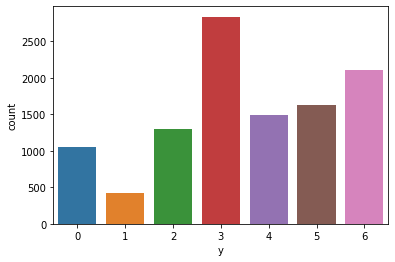

In [24]:
print(y_train.value_counts())
_ = sns.countplot(x='y', data=df)

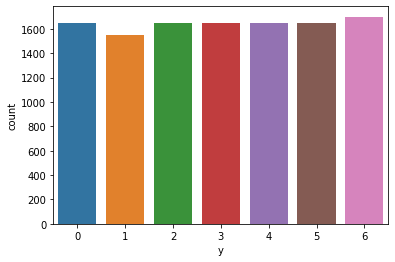

In [25]:
#imbalanced data 
from sklearn.ensemble import RandomForestClassifier 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

'''k=10 n=1800'''
over = SMOTE(sampling_strategy = {0:1650, 1:1550, 2:1650, 4:1650, 5:1650}, k_neighbors=10, random_state=42)
X_res, y_res = over.fit_resample(X_train ,y_train)

under = RandomUnderSampler(sampling_strategy = {3:1650, 6:1700}, random_state=42)
X_res, y_res = under.fit_resample(X_res, y_res)

_ = sns.countplot(x=y_res, data=df)

# `05` CatBoost

In [26]:
from catboost import CatBoostClassifier 

# Trying Catboost with resampled/balanced data
cat = CatBoostClassifier(iterations=1000, task_type="CPU", learning_rate=0.1, random_state=9, depth=2)
cat.fit(X_res, y_res)

0:	learn: 1.7837667	total: 63ms	remaining: 1m 2s
1:	learn: 1.6305342	total: 69.1ms	remaining: 34.5s
2:	learn: 1.5327563	total: 74.1ms	remaining: 24.6s
3:	learn: 1.4366812	total: 78.8ms	remaining: 19.6s
4:	learn: 1.3494995	total: 84.7ms	remaining: 16.9s
5:	learn: 1.2847554	total: 89.9ms	remaining: 14.9s
6:	learn: 1.2133581	total: 95.3ms	remaining: 13.5s
7:	learn: 1.1537208	total: 100ms	remaining: 12.5s
8:	learn: 1.0958689	total: 106ms	remaining: 11.7s
9:	learn: 1.0464456	total: 113ms	remaining: 11.2s
10:	learn: 1.0034991	total: 118ms	remaining: 10.6s
11:	learn: 0.9454565	total: 124ms	remaining: 10.2s
12:	learn: 0.9146286	total: 129ms	remaining: 9.8s
13:	learn: 0.8770139	total: 134ms	remaining: 9.44s
14:	learn: 0.8451432	total: 139ms	remaining: 9.13s
15:	learn: 0.8097785	total: 145ms	remaining: 8.89s
16:	learn: 0.7863750	total: 150ms	remaining: 8.65s
17:	learn: 0.7569418	total: 155ms	remaining: 8.44s
18:	learn: 0.7300063	total: 162ms	remaining: 8.34s
19:	learn: 0.7067915	total: 167ms	rem

In [27]:
train_preds = cat.predict(X_res)
report_cb = classification_report(y_res, train_preds, output_dict=True)
report = pd.DataFrame(report_cb)\
           .rename(columns={'0': 'BARBUNYA', '1': 'BOMBAY', '2': 'CALI', '3': 'DERMASON', '4': 'HOROZ', '5': 'SEKER', '6': 'SIRA'})\
           .transpose()
report

,precision,recall,f1-score,support
BARBUNYA,0.972823,0.954545,0.963597,1650.000000
BOMBAY,1.000000,1.000000,1.000000,1550.000000
CALI,0.959590,0.964242,0.961911,1650.000000
DERMASON,0.923031,0.930303,0.926653,1650.000000
HOROZ,0.972711,0.972121,0.972416,1650.000000
SEKER,0.975015,0.969697,0.972349,1650.000000
SIRA,0.898837,0.909412,0.904094,1700.000000
accuracy,0.956609,0.956609,0.956609,0.956609
macro avg,0.957429,0.957189,0.957288,11500.000000
weighted avg,0.956805,0.956609,0.956686,11500.000000


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


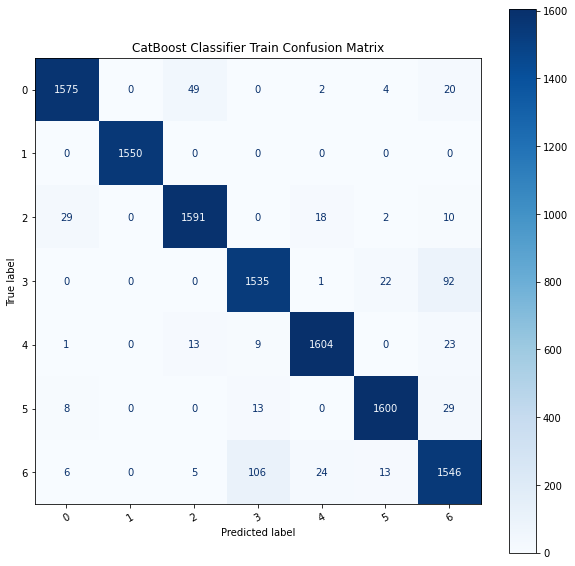

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cat, X_res, y_res,ax=ax, cmap='Blues')  
plt.xticks(rotation=30)
plt.title('CatBoost Classifier Train Confusion Matrix')
plt.show() 

In [29]:
test_preds = cat.predict(X_test)
report_cb = classification_report(y_test, test_preds, output_dict=True)
report = pd.DataFrame(report_cb).transpose()
report

,precision,recall,f1-score,support
0,0.950413,0.966387,0.958333,119.000000
1,0.974359,1.000000,0.987013,38.000000
2,0.948718,0.909836,0.928870,122.000000
3,0.930657,0.904255,0.917266,282.000000
4,0.962687,0.934783,0.948529,138.000000
5,0.942197,1.000000,0.970238,163.000000
6,0.889381,0.905405,0.897321,222.000000
accuracy,0.933579,0.933579,0.933579,0.933579
macro avg,0.942630,0.945809,0.943939,1084.000000
weighted avg,0.933750,0.933579,0.933386,1084.000000


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


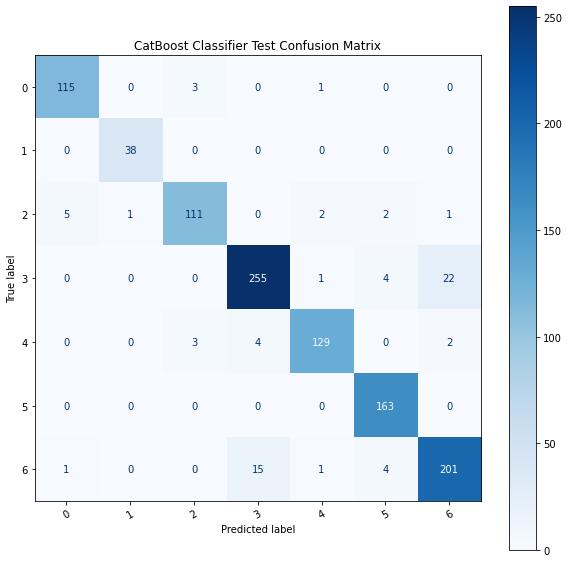

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cat, X_test, y_test,ax=ax,cmap='Blues')  
plt.xticks(rotation=30)
plt.title('CatBoost Classifier Test Confusion Matrix')
plt.show() 

# `06` Hyper-Parameters Tuning 

In [31]:
from catboost import CatBoostClassifier 
from sklearn.metrics import f1_score

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer



params = {'depth':range(1,5),
          'l2_leaf_reg':[7,2,5,10],
          'random_state': [0, 9, 42]
        }

# Using class weights instead of resampled data
class_wghts = [0.9, 1.0, 0.8, 0.4, 0.7, 0.6, 0.5]

model = CatBoostClassifier(iterations=1000, 
                         task_type="CPU", 
                         learning_rate=0.1, 
                         early_stopping_rounds=10,
                         bootstrap_type='Bernoulli',
                         subsample=0.5,
                         random_strength=5,
                         loss_function= 'MultiClass',
                         class_weights=class_wghts,
                         verbose=False)

cat = model.grid_search(params,
                               X=X_train,
                               y=y_train,
                               cv=4,
                               partition_random_seed=42,
                               stratified=True,
                               verbose=False)

Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2218590734
bestIteration = 607

Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.218790849
bestIteration = 608

Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2215033099
bestIteration = 607

Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2218078149
bestIteration = 680

Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2088555563
bestIteration = 664

Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2147176876
bestIteration = 442

Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.214080667
bestIteration = 463

Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2100796646
bestIteration = 659

Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.207420669
bestIteration = 372

Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2039842442
bestIteration = 475

Sto

In [33]:
cat['params']

{'depth': 3, 'random_seed': 9, 'l2_leaf_reg': 5}

In [34]:
# randm.best_params_

In [35]:
# model.fit(X_train, Y_train)

In [36]:
# # Best hyperparameters from the grid search
# grid_search.best_params_

# `07` Finaaaaally Train Our Model

## `Using CatBoost`

In [37]:
# 40 47 # iterations=1000, task_type="CPU", learning_rate=0.03, random_state=9, depth=3
class_wghts = {0: 0.9,
               1: 1.0,
               2: 0.8,
               3: 0.4,
               4: 0.7,
               5: 0.6,
               6: 0.5}
cat = CatBoostClassifier(iterations=1000, 
                         task_type="CPU", 
                         learning_rate=0.1, 
                         random_state=9, 
                         depth=3,
                         l2_leaf_reg=5,
                         early_stopping_rounds=10,
                         bootstrap_type='Bernoulli',
                         subsample=0.4,
                         random_strength=7,
                         loss_function= 'MultiClass',
                         class_weights=class_wghts).fit(X_train, y_train, verbose=False)

### Train Data Evaluation

In [38]:
train_preds = cat.predict(X_train)
report_cb = classification_report(y_train, train_preds, output_dict=True)
report = pd.DataFrame(report_cb).transpose()
report
#({0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'})

,precision,recall,f1-score,support
0,0.964592,0.958422,0.961497,938.000000
1,0.997375,1.000000,0.998686,380.000000
2,0.966130,0.965313,0.965722,1182.000000
3,0.943567,0.935812,0.939674,2555.000000
4,0.973254,0.970370,0.971810,1350.000000
5,0.963748,0.966392,0.965068,1458.000000
6,0.902299,0.915209,0.908708,1887.000000
accuracy,0.949436,0.949436,0.949436,0.949436
macro avg,0.958710,0.958788,0.958738,9750.000000
weighted avg,0.949564,0.949436,0.949485,9750.000000


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


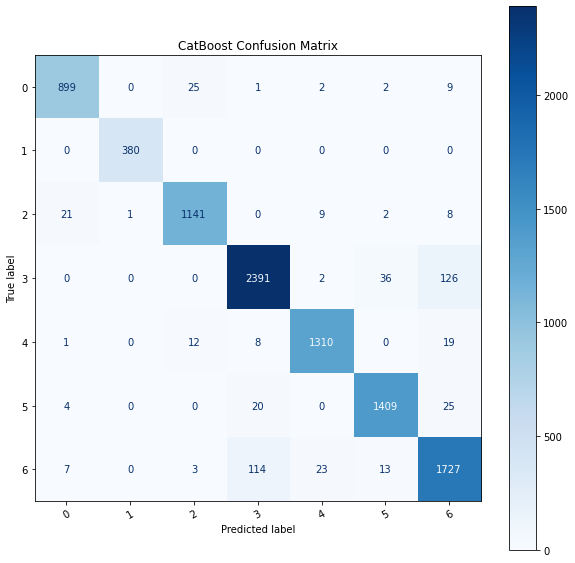

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cat, X_train, y_train,ax=ax,cmap='Blues')  
plt.xticks(rotation=30)
plt.title('CatBoost Confusion Matrix')
plt.show() 

### Validation Data Evaluation

In [40]:
test_preds = cat.predict(X_test)
report_cb = classification_report(y_test, test_preds, output_dict=True)
report = pd.DataFrame(report_cb).transpose()
report
# ({0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'})

,precision,recall,f1-score,support
0,0.957265,0.941176,0.949153,119.000000
1,1.000000,1.000000,1.000000,38.000000
2,0.933333,0.918033,0.925620,122.000000
3,0.930403,0.900709,0.915315,282.000000
4,0.963235,0.949275,0.956204,138.000000
5,0.958824,1.000000,0.978979,163.000000
6,0.878261,0.909910,0.893805,222.000000
accuracy,0.933579,0.933579,0.933579,0.933579
macro avg,0.945903,0.945586,0.945582,1084.000000
weighted avg,0.933896,0.933579,0.933532,1084.000000


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


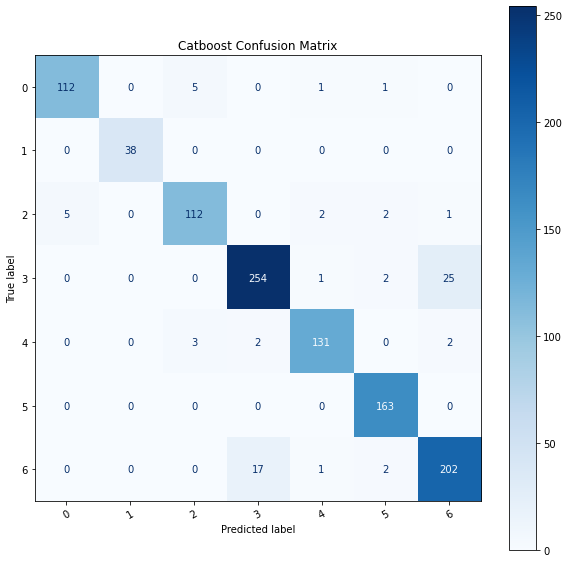

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cat, X_test, y_test,ax=ax,cmap='Blues')  
plt.xticks(rotation=30)
plt.title('Catboost Confusion Matrix')
plt.show() 

# `08` Prepare Test Data

In [42]:
test_df = pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake02/test.csv').set_index('ID', drop=False)

test_df = test_df.rename_axis(None)

test_df

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
10834,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
10835,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
10836,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
10837,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
10838,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504
13539,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923
13540,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748
13541,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263


### `7.1` Handling outliers in test data

In [43]:
# Removing outliers
indeces_dict_test = {}
for feature in ['EquivDiameter', 'Perimeter', 'MajorAxisLength', 'AspectRation', 'Extent', 'ShapeFactor3', 'Eccentricity']:
   
    current_feature = test_df[feature]
    
    upper_bound, lower_bound = handle_outliers_fit(df, feature, 1.5)
    
    # Outliers indeces
    outliers_test = test_df[((current_feature > upper_bound) | (current_feature < lower_bound))] #.index
    outliers_id_test = outliers_test.index
    indeces_dict_test.update({feature: outliers_id_test})



In [44]:
# Extra features for splitting outliers
'''
EquivDiameter: 1
Perimeter: 1
MajorAxisLength: 1

AspectRation: 4
Extent: 4

ShapeFactor3: 5
Eccentricity: 5

'''

indeces_outliers_class_1_test = [set(indeces_dict_test['EquivDiameter'].to_list()), 
                                 set(indeces_dict_test['Perimeter'].to_list()), 
                                 set(indeces_dict_test['MajorAxisLength'].to_list())]

indeces_outliers_class_4_test = [set(indeces_dict_test['AspectRation'].to_list()), 
                                set(indeces_dict_test['Extent'].to_list())]

indeces_outliers_class_5_test = [set(indeces_dict_test['ShapeFactor3'].to_list()), 
                                 set(indeces_dict_test['Eccentricity'].to_list())]

indeces_outliers_class_1_test = list(set.union(* indeces_outliers_class_1_test))
indeces_outliers_class_4_test = list(set.union(* indeces_outliers_class_4_test))
indeces_outliers_class_5_test = list(set.union(* indeces_outliers_class_5_test))

In [45]:
flags_df_test = pd.DataFrame(np.zeros((test_df.shape[0], 3)), columns = ['Flag_outliers_1', 'Flag_outliers_4', 'Flag_outliers_5']) 
flags_df_test = flags_df_test.merge(test_df['ID'].reset_index().drop(columns='index'), right_index = True, left_index = True, how = 'inner')
flags_df_test = flags_df_test.set_index('ID', drop=True).rename_axis(None)
flags_df_test

,Flag_outliers_1,Flag_outliers_4,Flag_outliers_5
10834,0.0,0.0,0.0
10835,0.0,0.0,0.0
10836,0.0,0.0,0.0
10837,0.0,0.0,0.0
10838,0.0,0.0,0.0
...,...,...,...
13538,0.0,0.0,0.0
13539,0.0,0.0,0.0
13540,0.0,0.0,0.0
13541,0.0,0.0,0.0


In [46]:
for Id in indeces_outliers_class_1_test:
    flags_df_test.at[Id, 'Flag_outliers_1'] = 1.0
    
for Id in indeces_outliers_class_4_test:
    flags_df_test.at[Id, 'Flag_outliers_4'] = 1.0
    
for Id in indeces_outliers_class_5_test:
    flags_df_test.at[Id, 'Flag_outliers_5'] = 1.0

flags_df_test

,Flag_outliers_1,Flag_outliers_4,Flag_outliers_5
10834,0.0,0.0,0.0
10835,0.0,0.0,0.0
10836,0.0,0.0,0.0
10837,0.0,0.0,0.0
10838,1.0,0.0,0.0
...,...,...,...
13538,0.0,0.0,0.0
13539,0.0,0.0,1.0
13540,0.0,1.0,0.0
13541,0.0,0.0,0.0


In [47]:
df_new_test = test_df
df_new_test = df_new_test.merge(flags_df_test, right_index = True, left_index = True, how = 'inner')

test_df = df_new_test
test_df

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Flag_outliers_1,Flag_outliers_4,Flag_outliers_5
10834,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,0.0,0.0,0.0
10835,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,0.0,0.0,0.0
10836,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,0.0,0.0,0.0
10837,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,0.0,0.0,0.0
10838,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504,0.0,0.0,0.0
13539,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923,0.0,0.0,1.0
13540,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748,0.0,1.0,0.0
13541,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263,0.0,0.0,0.0


In [48]:
test_df['Flag_outliers_1'].value_counts()

0.0    2603
1.0     106
Name: Flag_outliers_1, dtype: int64

In [49]:
flags_df_test['Flag_outliers_4'].value_counts()

0.0    2571
1.0     138
Name: Flag_outliers_4, dtype: int64

In [50]:
flags_df_test['Flag_outliers_5'].value_counts()

0.0    2515
1.0     194
Name: Flag_outliers_5, dtype: int64

### `7.2` Prepare For Submission

In [51]:
df_submission = pd.DataFrame()
df_submission["ID"] = test_df["ID"]
df_submission

,ID
10834,10834
10835,10835
10836,10836
10837,10837
10838,10838
...,...
13538,13538
13539,13539
13540,13540
13541,13541


In [52]:
test_df = test_df.drop(columns = ['ID'])
test_df = pd.DataFrame(test_df)
y_pred_submission = cat.predict(test_df)

df_submission["y"]= y_pred_submission
df_submission["y"] = df_submission["y"].map({0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'})

df_submission

,ID,y
10834,10834,HOROZ
10835,10835,DERMASON
10836,10836,BARBUNYA
10837,10837,DERMASON
10838,10838,BOMBAY
...,...,...
13538,13538,CALI
13539,13539,SEKER
13540,13540,HOROZ
13541,13541,DERMASON


In [53]:
df_submission[['ID', 'y']].to_csv('submission.csv', index=False)